# The goal here is to make first statistics about car crashes and weather forecast

First let's aquire the dataset, cleaned 

In [20]:
import pandas as pd
import numpy as np

dataset=pd.read_csv("completed_dataset_sample.csv").copy()
dataset.head()
print(dataset.iloc[0])


Unnamed: 0.5                                                        0
Unnamed: 0.4                                                        0
Unnamed: 0.3                                                        0
Unnamed: 0.2                                                        0
Unnamed: 0.1                                                        0
Unnamed: 0                                                          0
Report Number                                             MCP3130004M
Local Case Number                                           220015468
Agency Name                                  Montgomery County Police
ACRS Report Type                                Property Damage Crash
Crash Date/Time                                04/12/2022 07:40:00 AM
Route Type                                           Maryland (State)
Road Name                                                 GEORGIA AVE
Cross-Street Name                                     CONNECTICUT AVE
Off-Road Description

## We want to explore how each variable influances crash accidents. To do that, let's transform each textual variable in a numerical variable 

### For that we shall explore each column content to see which one is appropriate to do regressions

In [16]:
dataset.columns

Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'Report Number', 'Local Case Number',
       'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type',
       'Road Name', 'Cross-Street Name', 'Off-Road Description',
       'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location',
       'temperature', 'apparent_temperature', 'humidity', 'weather_code',
       'pr

In [17]:
print(dataset["Driver Substance Abuse"].value_counts())

Driver Substance Abuse
NONE DETECTED                                          3841
Not Suspect of Alcohol Use, Not Suspect of Drug Use     904
UNKNOWN                                                 382
ALCOHOL PRESENT                                         121
Unknown, Unknown                                        107
ALCOHOL CONTRIBUTED                                      43
Suspect of Alcohol Use, Not Suspect of Drug Use          25
ILLEGAL DRUG PRESENT                                      9
ILLEGAL DRUG CONTRIBUTED                                  7
OTHER                                                     4
Suspect of Alcohol Use, Suspect of Drug Use               3
Suspect of Alcohol Use, Unknown                           3
MEDICATION CONTRIBUTED                                    3
Unknown, Not Suspect of Drug Use                          2
MEDICATION PRESENT                                        2
COMBINED SUBSTANCE PRESENT                                2
Not Suspect of Al

In [18]:
print(dataset["Injury Severity"].value_counts())

Injury Severity
NO APPARENT INJURY          4502
No Apparent Injury           795
POSSIBLE INJURY              530
SUSPECTED MINOR INJURY       371
Suspected Minor Injury        97
Possible Injury               78
SUSPECTED SERIOUS INJURY      45
Suspected Serious Injury       6
FATAL INJURY                   4
Fatal Injury                   3
Name: count, dtype: int64


In [21]:
print(dataset["Collision Type"].value_counts())

Collision Type
SAME DIR REAR END                1825
STRAIGHT MOVEMENT ANGLE           915
OTHER                             649
SINGLE VEHICLE                    519
SAME DIRECTION SIDESWIPE          508
HEAD ON LEFT TURN                 381
Front to Rear                     283
Angle                             232
Sideswipe, Same Direction         180
SAME DIRECTION LEFT TURN          118
HEAD ON                           117
Single Vehicle                    113
SAME DIRECTION RIGHT TURN         107
OPPOSITE DIRECTION SIDESWIPE       87
Rear To Side                       73
ANGLE MEETS LEFT TURN              68
Other                              58
Front to Front                     52
ANGLE MEETS RIGHT TURN             39
Sideswipe, Opposite Direction      33
SAME DIR BOTH LEFT TURN            24
ANGLE MEETS LEFT HEAD ON           23
UNKNOWN                            18
SAME DIR REND LEFT TURN            17
Rear To Rear                       16
SAME DIR REND RIGHT TURN           

Let's plot some numerical variables 

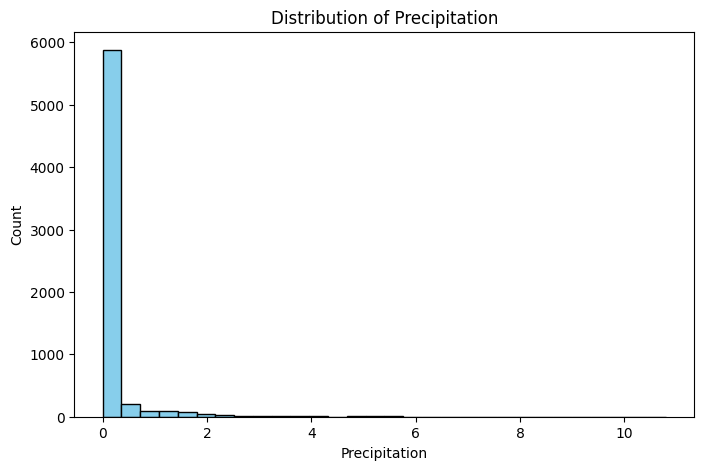

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(dataset['precipitation'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Precipitation')
plt.ylabel('Count')
plt.title('Distribution of Precipitation')
plt.show()


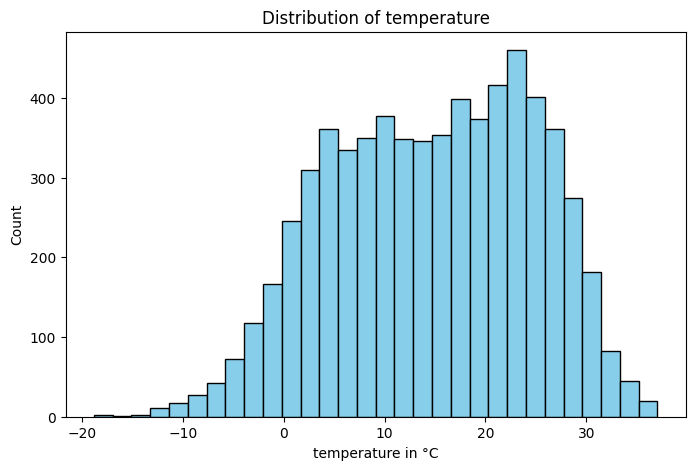

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(dataset['temperature'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('temperature in °C')
plt.ylabel('Count')
plt.title('Distribution of temperature')
plt.show()


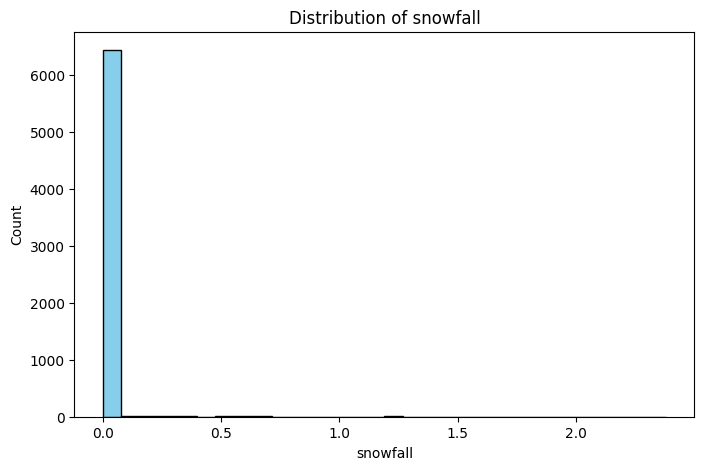

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(dataset['snowfall'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('snowfall')
plt.ylabel('Count')
plt.title('Distribution of snowfall')
plt.show()


While we see that there is a great range of temperatures, the county we chose is not very rainy nor snowy 

##### Transformation of the variables 

In [5]:
import numpy as np

# Fonction pour convertir Driver Substance Abuse en 0/1
def substance_binary(value):
    if pd.isna(value):
        return 0  # Considérer NaN comme non consommateur
    value = str(value).upper()  # Pour uniformiser
    # Si la valeur indique consommation
    substance_keywords = [
        "ALCOHOL", "DRUG", "MEDICATION", "COMBINED SUBSTANCE", "SUSPECT"
    ]
    for kw in substance_keywords:
        if kw in value:
            return 1
    # Sinon 0
    return 0

# Créer la colonne binaire
dataset['Driver_Substance_Binary'] = dataset['Driver Substance Abuse'].apply(substance_binary)

# Vérification
print(dataset[['Driver Substance Abuse', 'Driver_Substance_Binary']].head(20))

# Optionnel : compter les 0 et 1
print(dataset['Driver_Substance_Binary'].value_counts())


                               Driver Substance Abuse  Driver_Substance_Binary
0                                             UNKNOWN                        0
1                                       NONE DETECTED                        0
2                                                 NaN                        0
3                                       NONE DETECTED                        0
4                                       NONE DETECTED                        0
5                                       NONE DETECTED                        0
6   Not Suspect of Alcohol Use, Not Suspect of Dru...                        1
7   Not Suspect of Alcohol Use, Not Suspect of Dru...                        1
8   Not Suspect of Alcohol Use, Not Suspect of Dru...                        1
9                                       NONE DETECTED                        0
10                                      NONE DETECTED                        0
11                                      NONE DETECTE

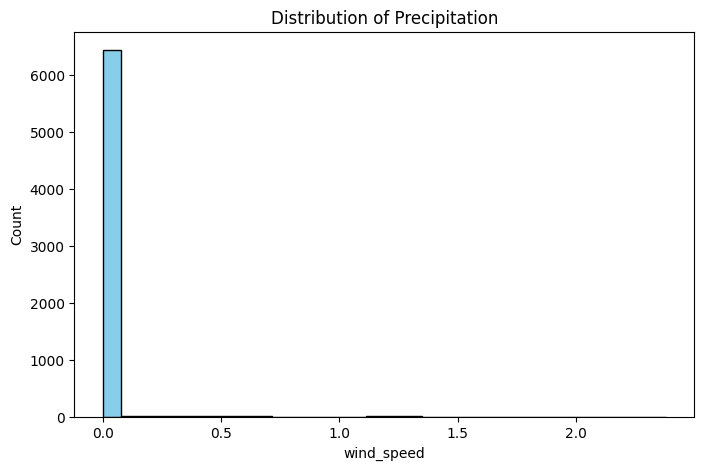

In [8]:
#pip install scikit-learn
#pip install statsmodels


In [9]:
import numpy as np

# Mapping dictionary
injury_map = {
    'NO APPARENT INJURY': 0,
    'No Apparent Injury': 0,
    'POSSIBLE INJURY': 1,
    'Possible Injury': 1,
    'SUSPECTED MINOR INJURY': 2,
    'Suspected Minor Injury': 2,
    'SUSPECTED SERIOUS INJURY': 3,
    'Suspected Serious Injury': 3,
    'FATAL INJURY': 4,
    'Fatal Injury': 4,
    np.nan: np.nan
}

# Create numeric column
dataset['injury_severity_num'] = dataset['Injury Severity'].map(injury_map)

# Check results
print(dataset[['Injury Severity', 'injury_severity_num']].head(10))


          Injury Severity  injury_severity_num
0      NO APPARENT INJURY                  0.0
1         POSSIBLE INJURY                  1.0
2      NO APPARENT INJURY                  0.0
3         POSSIBLE INJURY                  1.0
4      NO APPARENT INJURY                  0.0
5  SUSPECTED MINOR INJURY                  2.0
6      No Apparent Injury                  0.0
7  Suspected Minor Injury                  2.0
8      No Apparent Injury                  0.0
9      NO APPARENT INJURY                  0.0


In [10]:
# Normalize values: convert to uppercase and remove extra spaces
dataset['accident_clean'] = dataset["Vehicle Damage Extent"].str.upper().str.strip()

# Severity mapping dictionary
# The numbers represent increasing severity of damage
severity_map = {
    'NO DAMAGE': 0,
    'SUPERFICIAL': 1,
    'FUNCTIONAL': 2,
    'DISABLING': 3,
    'DESTROYED': 4,
    'UNKNOWN': 0,
    'OTHER': 0,
    'VEHICLE NOT AT SCENE': 0,
    np.nan: np.nan  # Keep NaN values without converting them
}

# Create a new column with severity scores based on the mapped values
dataset['severity'] = dataset['accident_clean'].map(severity_map)

# Display the result for verification
print(dataset[["Vehicle Damage Extent", 'severity']].head())
dataset.columns


  Vehicle Damage Extent  severity
0           SUPERFICIAL       1.0
1           SUPERFICIAL       1.0
2             DISABLING       3.0
3             DESTROYED       4.0
4            FUNCTIONAL       2.0


Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'Report Number', 'Local Case Number',
       'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type',
       'Road Name', 'Cross-Street Name', 'Off-Road Description',
       'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location',
       'temperature', 'apparent_temperature', 'humidity', 'weather_code',
       'pr

Regarder les termes d'interaction. 
On met 100 regressions et on élimine les termes inutiles. Quels facteurs interragissent entre eux

Réfléchir à comment gérer les termes d'interaction. 

=> Avoir une prochaine regression (un peu simple) pour la prochaine fois.

=> Faire la visualisation (dans le rapport) avec les termes croisés importants

=> Interactions d'ordre superieur 

# Regression 

In [11]:
def clean_column(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")
    df[column_name] = df[column_name].replace([np.inf, -np.inf], np.nan)
    return df.dropna(subset=[column_name])


In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

def linear_regression_multi(df, explanatory_vars, dependent_var, plot=True):
    """
    Perform a multiple linear regression (OLS) on several columns of a DataFrame
    and optionally plot the regression line for the first explanatory variable.

    Parameters:
    df (pd.DataFrame): Input DataFrame
    explanatory_vars (list of str): List of independent variable column names
    dependent_var (str): Name of the dependent variable column
    plot (bool): Whether to plot the regression line for the first explanatory variable

    Returns:
    model: statsmodels OLS fitted model
    """
    # Clean the dataset for all columns
    for col in explanatory_vars + [dependent_var]:
        df = clean_column(df, col)

    # Select X and y
    X = df[explanatory_vars]
    y = df[dependent_var]

    # Add constant for intercept
    X = sm.add_constant(X)

    # Fit OLS regression
    model = sm.OLS(y, X).fit()

    # Print summary
    print(model.summary())

    # Optional plot for the first explanatory variable
    if plot and len(explanatory_vars) == 1:
        plt.figure(figsize=(8, 5))
        plt.scatter(df[explanatory_vars[0]], y, color='blue', alpha=0.6, label='Data points')
        plt.plot(df[explanatory_vars[0]], model.predict(X), color='red', linewidth=2, label='Regression line')
        plt.xlabel(explanatory_vars[0])
        plt.ylabel(dependent_var)
        plt.title(f'Linear Regression: {dependent_var} ~ {explanatory_vars[0]}')
        plt.legend()
        plt.show()
    
    return model

# Example usage:
explanatory_vars = ["precipitation", "temperature", "humidity", "wind_speed","day_or_night_code"]
explanatory_vars2 = ["day_or_night_code","Driver_Substance_Binary"]
dependent_variable = "injury_severity_num"
dependent_variable2= "Driver_Substance_Binary"

model = linear_regression_multi(dataset, explanatory_vars2, dependent_variable, plot=False)


                             OLS Regression Results                            
Dep. Variable:     injury_severity_num   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     2.980
Date:                 Mon, 15 Dec 2025   Prob (F-statistic):             0.0509
Time:                         22:40:34   Log-Likelihood:                -6195.7
No. Observations:                 6431   AIC:                         1.240e+04
Df Residuals:                     6428   BIC:                         1.242e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

tracer pourcentage d'accidents sous substance 

In [13]:
# Supposons que les colonnes soient 'precipitation' et 'injury_severity_num'
x = dataset['Driver_Substance_Binary']
y = dataset['day_or_night_code']

# Corrélation de Pearson
corr = x.corr(y)
print(f"Correlation between Driver_Substance_Binarytion and day_or_night_code: {corr:.3f}")


Correlation between Driver_Substance_Binarytion and day_or_night_code: 0.070
